In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [3]:
df = pd.read_csv('GE.csv')
df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-23,85.440002,87.839996,84.959999,86.879997,86.606728,7563063
1,2020-12-24,86.800003,86.800003,84.959999,85.199997,84.932014,3756213
2,2020-12-28,85.599998,86.239998,84.639999,85.120003,84.852264,6724588
3,2020-12-29,85.279999,86.160004,84.320000,84.480003,84.214279,6629488
4,2020-12-30,84.639999,86.800003,84.400002,85.680000,85.410500,6327625


In [4]:
df.shape

(252, 7)

In [5]:
train_dates = pd.to_datetime(df['Date'])

In [6]:
train_dates.tail(15)

237   2021-12-02
238   2021-12-03
239   2021-12-06
240   2021-12-07
241   2021-12-08
242   2021-12-09
243   2021-12-10
244   2021-12-13
245   2021-12-14
246   2021-12-15
247   2021-12-16
248   2021-12-17
249   2021-12-20
250   2021-12-21
251   2021-12-22
Name: Date, dtype: datetime64[ns]

In [7]:
cols = list(df)[1:6]

In [8]:
cols

['Open', 'High', 'Low', 'Close', 'Adj Close']

In [9]:
df_for_training = df[cols].astype(float)

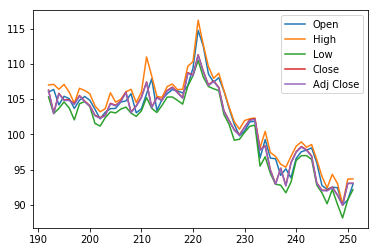

In [10]:
df_for_training.tail(60).plot.line()

In [11]:
df_for_training

,Open,High,Low,Close,Adj Close
0,85.440002,87.839996,84.959999,86.879997,86.606728
1,86.800003,86.800003,84.959999,85.199997,84.932014
2,85.599998,86.239998,84.639999,85.120003,84.852264
3,85.279999,86.160004,84.320000,84.480003,84.214279
4,84.639999,86.800003,84.400002,85.680000,85.410500
5,85.199997,86.639999,84.639999,86.400002,86.128227
6,87.120003,87.199997,83.199997,83.760002,83.496529
7,83.440002,87.040001,83.360001,86.160004,85.888992
8,86.639999,92.959999,86.639999,90.879997,90.594131
9,92.480003,92.559998,89.919998,90.160004,89.876419


In [12]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [13]:
len(df_for_training_scaled)

252

In [14]:
trainX = []
trainY = []

n_future = 1
n_past = 14
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

In [17]:
trainX[0]

array([[-2.49373214, -2.35993681, -2.36851892, -2.29279554, -2.30218401],
       [-2.28885219, -2.51846736, -2.36851892, -2.54910513, -2.55747165],
       [-2.46962924, -2.6038313 , -2.4172077 , -2.56130943, -2.56962846],
       [-2.5178361 , -2.61602512, -2.46589634, -2.65895118, -2.6668807 ],
       [-2.61425012, -2.51846736, -2.45372384, -2.47587336, -2.48453289],
       [-2.52988815, -2.54285745, -2.4172077 , -2.36602609, -2.37512505],
       [-2.24064518, -2.45749457, -2.63630756, -2.7687983 , -2.77629205],
       [-2.79502596, -2.48188344, -2.61196255, -2.40264144, -2.41159321],
       [-2.3129563 , -1.57947299, -2.11290278, -1.68253462, -1.69435801],
       [-1.43317774, -1.64044685, -1.61384284, -1.79238051, -1.80376356],
       [-1.75857551, -1.79897862, -1.71122027, -1.70694444, -1.71866813],
       [-1.97550752, -1.68922581, -1.83294163, -1.5726875 , -1.58494773],
       [-1.49343665, -1.22582554, -1.40691534, -1.16991529, -1.18377937],
       [-1.16803992, -1.33557835, -1.2

In [16]:
trainX.shape

(238, 14, 5)

In [13]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 64)            17920     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(trainX, trainY, epochs=40, batch_size=1, validation_split=0.1, verbose=1)

Epoch 1/40
134/134 [==============================] - 2s 6ms/step - loss: 0.2791 - val_loss: 1.7502
Epoch 2/40
134/134 [==============================] - 1s 4ms/step - loss: 0.2440 - val_loss: 1.9182
Epoch 3/40
134/134 [==============================] - 1s 4ms/step - loss: 0.2408 - val_loss: 1.8005
Epoch 4/40
134/134 [==============================] - 1s 4ms/step - loss: 0.2532 - val_loss: 1.9401
Epoch 5/40
134/134 [==============================] - 1s 4ms/step - loss: 0.2412 - val_loss: 1.9758
Epoch 6/40
134/134 [==============================] - 1s 4ms/step - loss: 0.2419 - val_loss: 2.0373
Epoch 7/40
134/134 [==============================] - 1s 4ms/step - loss: 0.2317 - val_loss: 1.9386
Epoch 8/40
134/134 [==============================] - 1s 4ms/step - loss: 0.2406 - val_loss: 1.9295
Epoch 9/40
134/134 [==============================] - 1s 4ms/step - loss: 0.2226 - val_loss: 1.8948
Epoch 10/40
134/134 [==============================] - 1s 4ms/step - loss: 0.2233 - val_loss: 1.8697

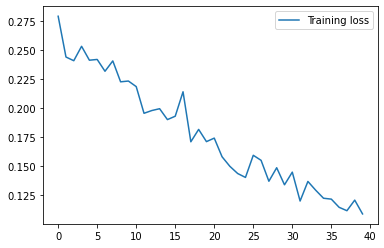

In [18]:
plt.plot(history.history['loss'], label='Training loss')
#plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [24]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [25]:
pd.date_range(list(train_dates)[-90], periods=90, freq=us_bd)

DatetimeIndex(['2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10', '2021-09-13', '2021-09-14',
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-20',
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-12', '2021-10-13',
               '2021-10-14', '2021-10-15', '2021-10-18', '2021-10-19',
               '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-25',
               '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29',
               '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
      

In [26]:
df.tail(90)

,Date,Open,High,Low,Close,Adj Close,Volume
162,2021-08-17,102.540001,103.269997,100.360001,101.620003,101.452217,8177400
163,2021-08-18,101.080002,103.470001,100.760002,101.410004,101.242561,6496500
164,2021-08-19,100.000000,100.820000,98.599998,99.419998,99.255844,10805700
165,2021-08-20,99.589996,100.669998,99.099998,100.050003,99.884811,6355700
166,2021-08-23,100.599998,101.480003,100.269997,100.970001,100.803284,6007400
...,...,...,...,...,...,...,...
247,2021-12-16,92.519997,94.339996,92.199997,92.529999,92.449051,7127400
248,2021-12-17,92.449997,93.070000,90.110001,91.449997,91.369995,9065000
249,2021-12-20,90.000000,90.099998,88.169998,89.980003,89.980003,6013200
250,2021-12-21,90.720001,93.669998,90.720001,93.059998,93.059998,7617700


In [27]:
#n_futures = 90
#forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_futures, freq='1d').tolist()

In [28]:
#df_for_test = test[cols].astype(float)

In [29]:
#df_for_test_scaled = scaler.transform(df_for_test)

In [30]:
#n_input = 14

In [26]:
#testX = []

In [27]:
# for i in range(n_input, len(df_for_test_scaled)):
 #   testX.append(df_for_test_scaled[i - n_input:i, 0:df_for_test.shape[1]])

#testX = np.array(testX)

In [28]:
#testX.shape

(76, 14, 5)

In [34]:
trainX[-90]

[array([[ 0.49057517,  0.46860848,  0.46773896,  0.52138117,  0.51970561],
        [ 0.44786571,  0.34929654,  0.41379769,  0.42428238,  0.42298391],
        [ 0.23431785,  0.28421821,  0.00383785, -0.0827887 , -0.08210872],
        [ 0.02077013,  0.11067482, -0.05010451, -0.25540841, -0.25405559],
        [-0.36361691,  0.01305624, -0.3413923 ,  0.12219791,  0.12207877],
        [ 0.22364019,  0.22998568,  0.17645225,  0.2732396 ,  0.27253033],
        [ 0.19160839,  0.14321398,  0.2519709 ,  0.23008464,  0.22954456],
        [ 0.25567212,  0.47945415,  0.38143176,  0.6076911 ,  0.60567797],
        [ 0.68276876,  0.55538018,  0.62956589,  0.42428238,  0.42298391],
        [ 0.5226071 ,  0.47945415,  0.65114218,  0.58611308,  0.58418468],
        [ 0.77886549,  0.70723034,  0.88848762,  0.78031068,  0.77762498],
        [ 0.76818782,  0.63130526,  0.88848762,  0.71557783,  0.71314484],
        [ 0.70412303,  0.66384442,  0.76981544,  0.7047899 ,  0.70239873],
        [ 0.5546401 ,  0.

In [36]:
prediction = model.predict(trainX[-14:])

In [37]:
prediction_copy = scaler.inverse_transform(np.repeat(prediction, df_for_training.shape[1], axis=1))[:,0]

In [38]:
prediction_copy.shape

(90,)

In [39]:
test.shape

(90, 7)

In [40]:
test['Prediction'] = prediction_copy[:]

<ipython-input-40-fe0669fff8a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = prediction_copy[:]


In [41]:
test

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
162,2021-08-17,102.540001,103.269997,100.360001,101.620003,101.452217,8177400,106.936516
163,2021-08-18,101.080002,103.470001,100.760002,101.410004,101.242561,6496500,108.151787
164,2021-08-19,100.000000,100.820000,98.599998,99.419998,99.255844,10805700,108.163200
165,2021-08-20,99.589996,100.669998,99.099998,100.050003,99.884811,6355700,106.982666
166,2021-08-23,100.599998,101.480003,100.269997,100.970001,100.803284,6007400,108.481712
...,...,...,...,...,...,...,...,...
247,2021-12-16,92.519997,94.339996,92.199997,92.529999,92.449051,7127400,103.775848
248,2021-12-17,92.449997,93.070000,90.110001,91.449997,91.369995,9065000,105.553757
249,2021-12-20,90.000000,90.099998,88.169998,89.980003,89.980003,6013200,105.926010
250,2021-12-21,90.720001,93.669998,90.720001,93.059998,93.059998,7617700,106.501762


<AxesSubplot:>

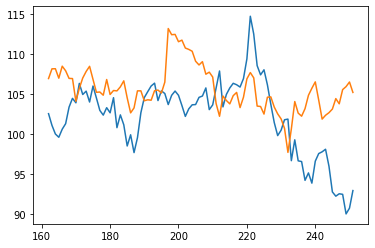

In [47]:
test['Open'].plot.line()
test['Prediction'].plot.line()
